# CS573: Optimization Methods
## Assignment 2
### Vasileios Papageridis - csd4710

---

## Exercise 1: Unconstrained Least Squares Regression

### Overview
In this exercise we will implement a linear regression model using the least squares method. We will use the [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) to train our model and then we will evaluate it using the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) metric.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis
In order to understand the data we are working with, we will perform an exploratory data analysis. The goal is to extract the most important characteristics of the data and to understand the relationships between the features and the target variable.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delim_whitespace=True, names=column_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

### A short description of the dataset
The Boston Housing Dataset contains information about 506 houses in Boston. The dataset contains 14 features and the target variable is the median value of the houses in thousands of dollars. The features are the following:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

### Checking for null values in the dataset:

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can clearly observe there are no null values in our data set. This is a very important step in order to discover a way to handle these values.

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Distribution of Features
The histograms below provide a visual understanding of the distribution of each feature. Each plot corresponds to a different attribute of the dataset (those attributes discused earlier) and it gives us insights into the range and spread of values for each of the features.

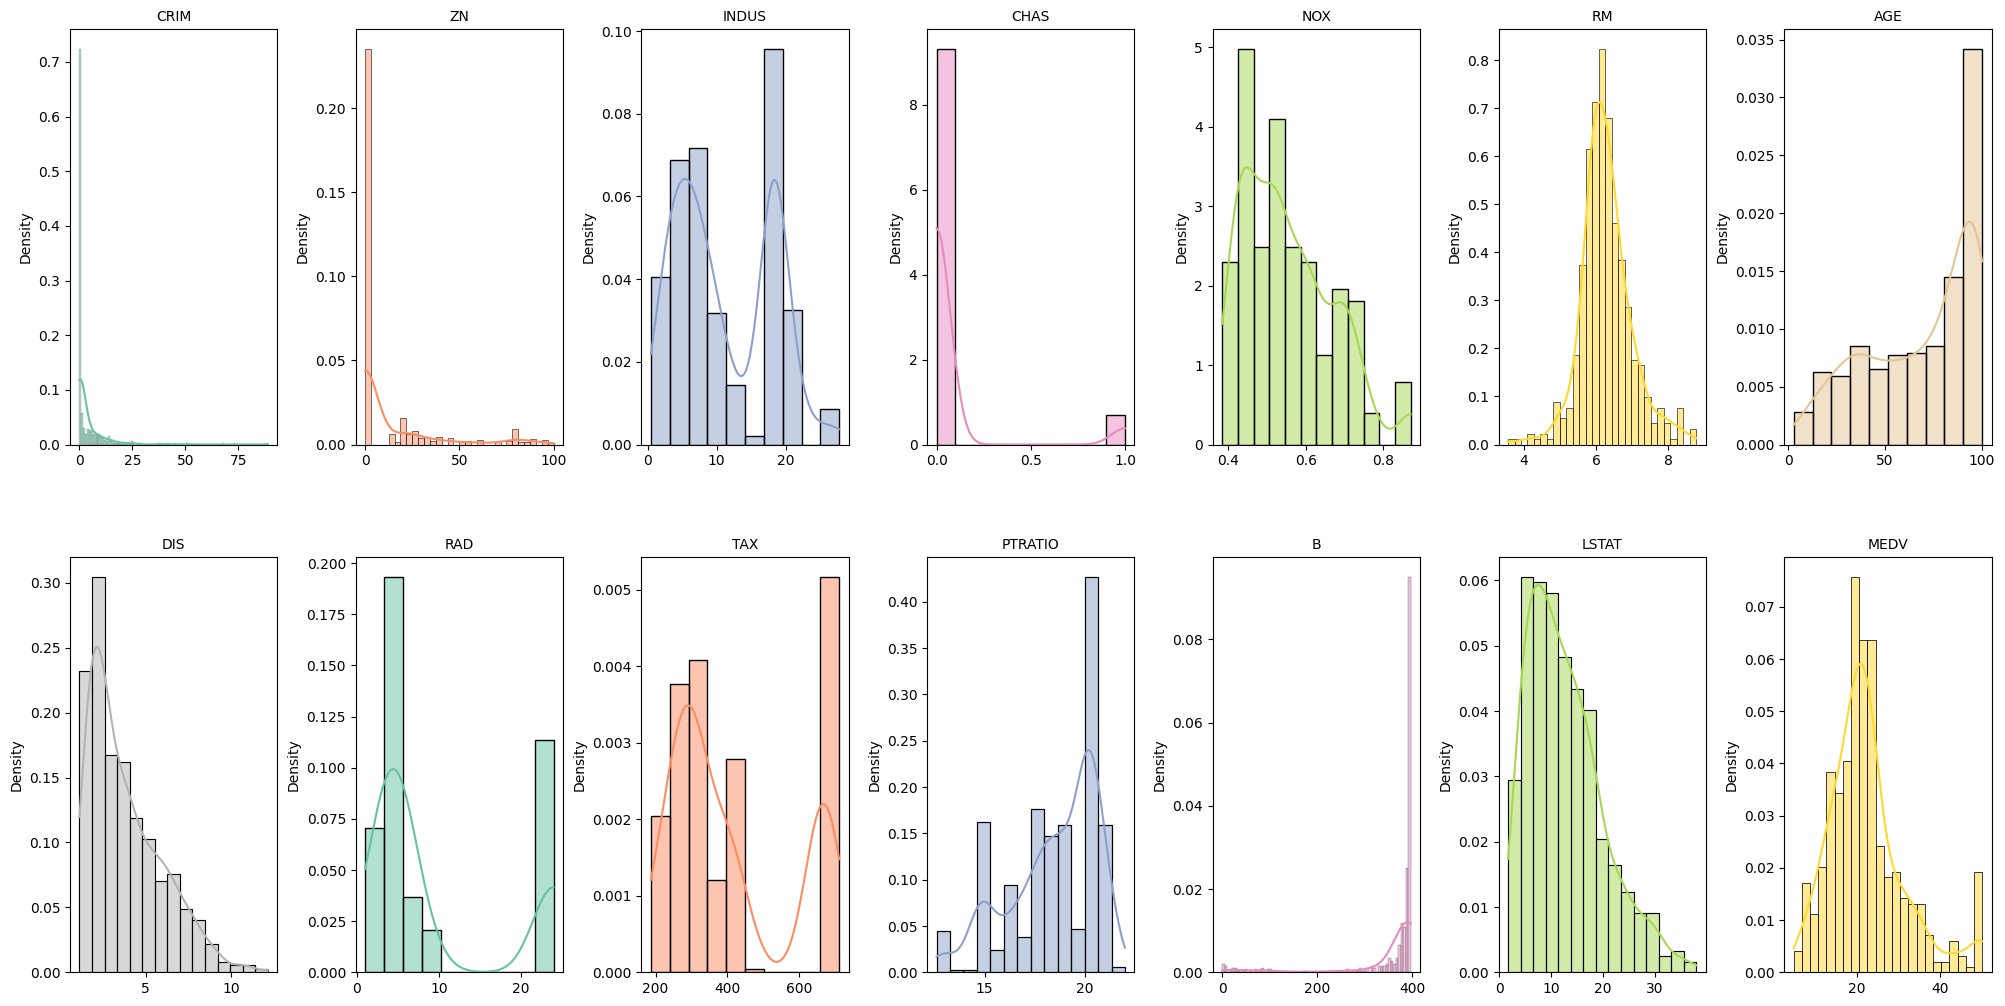

In [7]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index], kde=True, stat='density', color=sns.color_palette('Set2')[index % 8])
    ax[index].set_title(col, fontsize=10)
    ax[index].set_xlabel('')
    ax[index].set_ylabel('Density')
    ax[index].grid(False)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

### Observing Mean Values Variation

To understand the variation in mean values of different features in our dataset, we can calculate the mean values for each feature and visualize them using a bar plot.


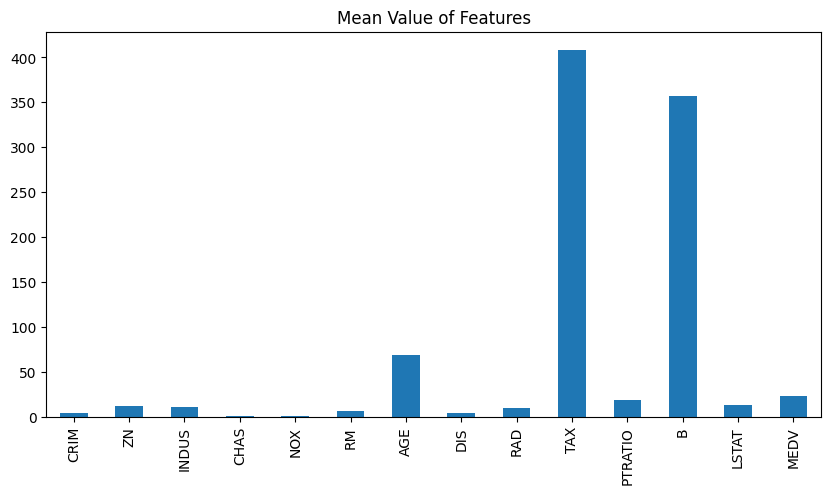

In [8]:
df.describe().loc['mean'].plot.bar(figsize=(10, 5))
plt.title('Mean Value of Features')
plt.show()

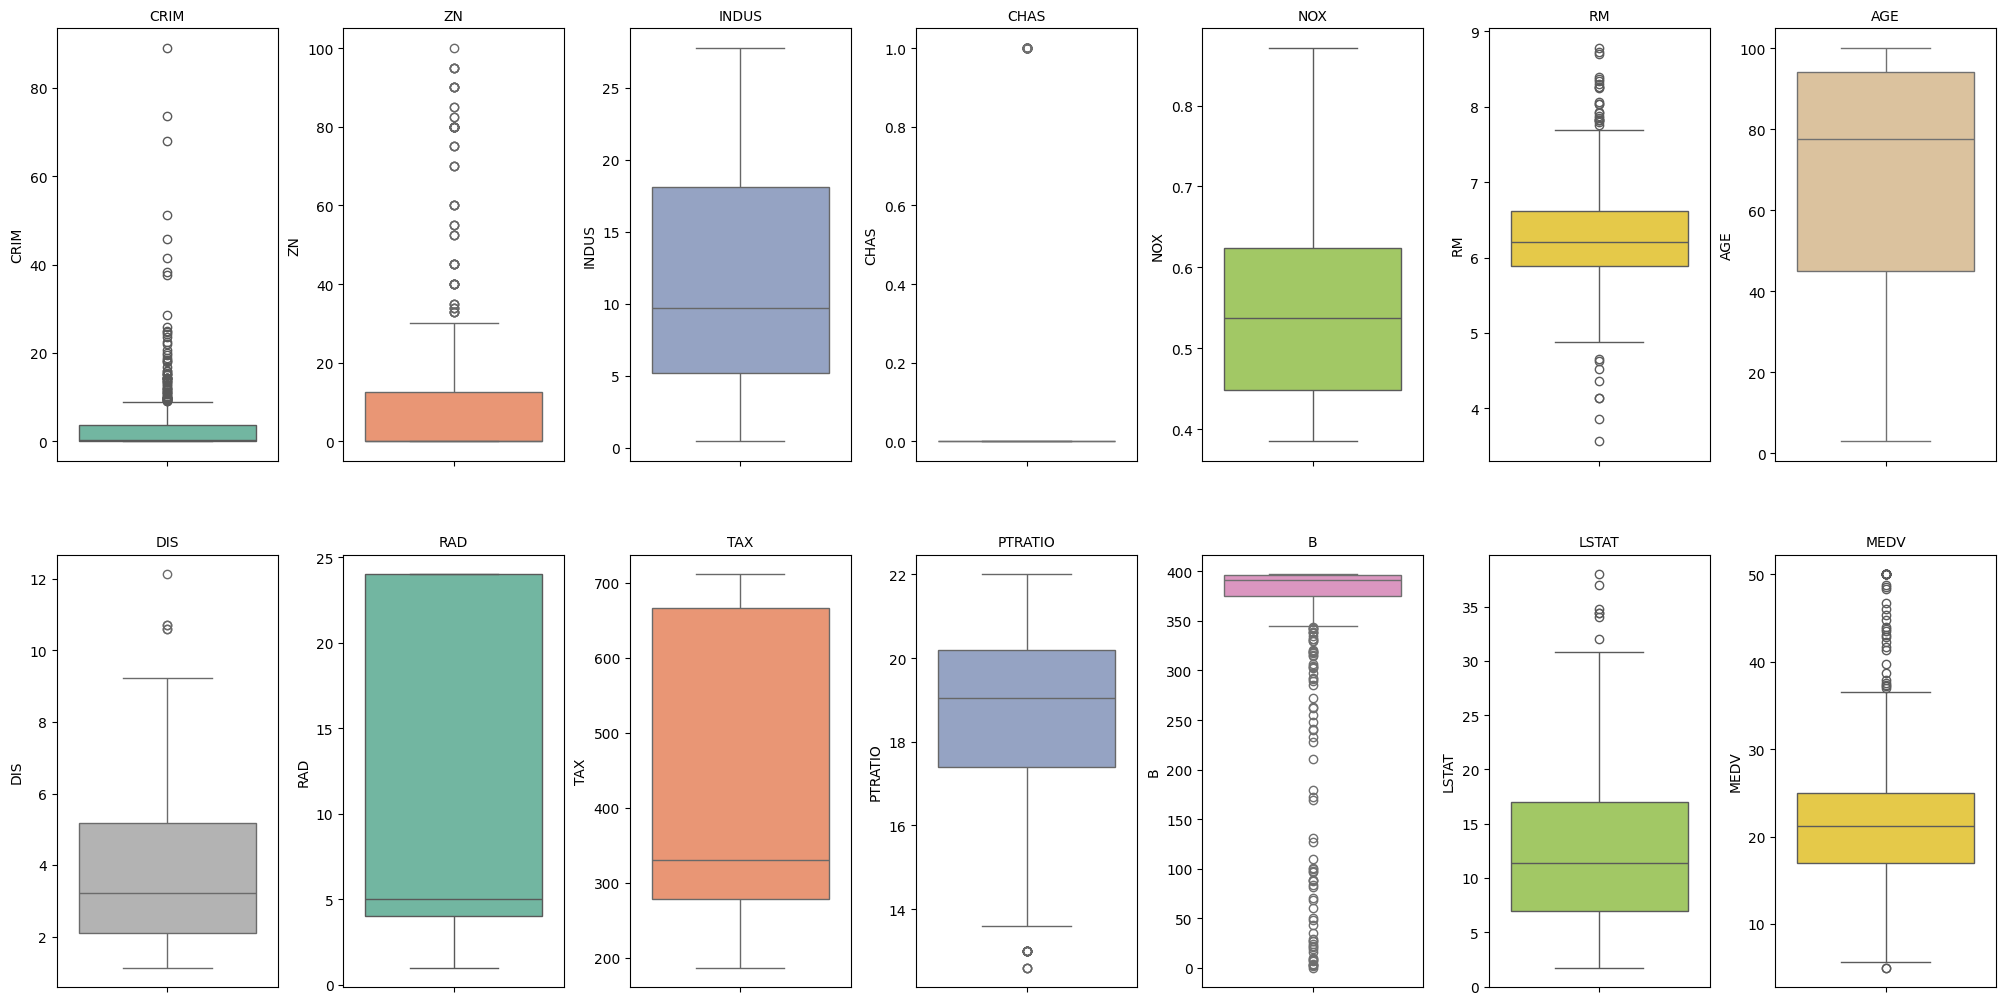

In [9]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], color=sns.color_palette('Set2')[index % 8])
    ax[index].set_title(col, fontsize=10)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Boxplot Analysis for ZN and INDUS Variables

### ZN (Proportion of Residential Land Zoned for Lots Over 25,000 sq.ft.)
- The boxplot for **ZN** shows a greater concentration of values in the lower range (first quartile to median), which indicates that a larger number of properties are in areas with smaller residential zones.
- The distribution is skewed towards the lower end, with fewer properties having a high proportion of residential land zoned for larger lots (over 25,000 sq.ft.).

### INDUS (Proportion of Non-Retail Business Acres Per Town)
- Similar to **ZN**, **INDUS** has more values concentrated between the first quartile and the median, suggesting that most houses are located in areas with a smaller proportion of non-retail business acres per town.
- The presence of fewer values between the median and the third quartile indicates that fewer areas are heavily industrialized.

These insights from the **ZN** and **INDUS** variables suggest a predominance of residential zoning with smaller lots and a lower proportion of non-retail business areas in the towns included in the dataset. This reflects the residential and commercial zoning policies affecting the housing market in these areas.


### Correlation Coefficient of Features

The correlation coefficient is a useful metric to understand the relationship between different features in the dataset. In our case, we are interested in the correlation between the features and the target variable.

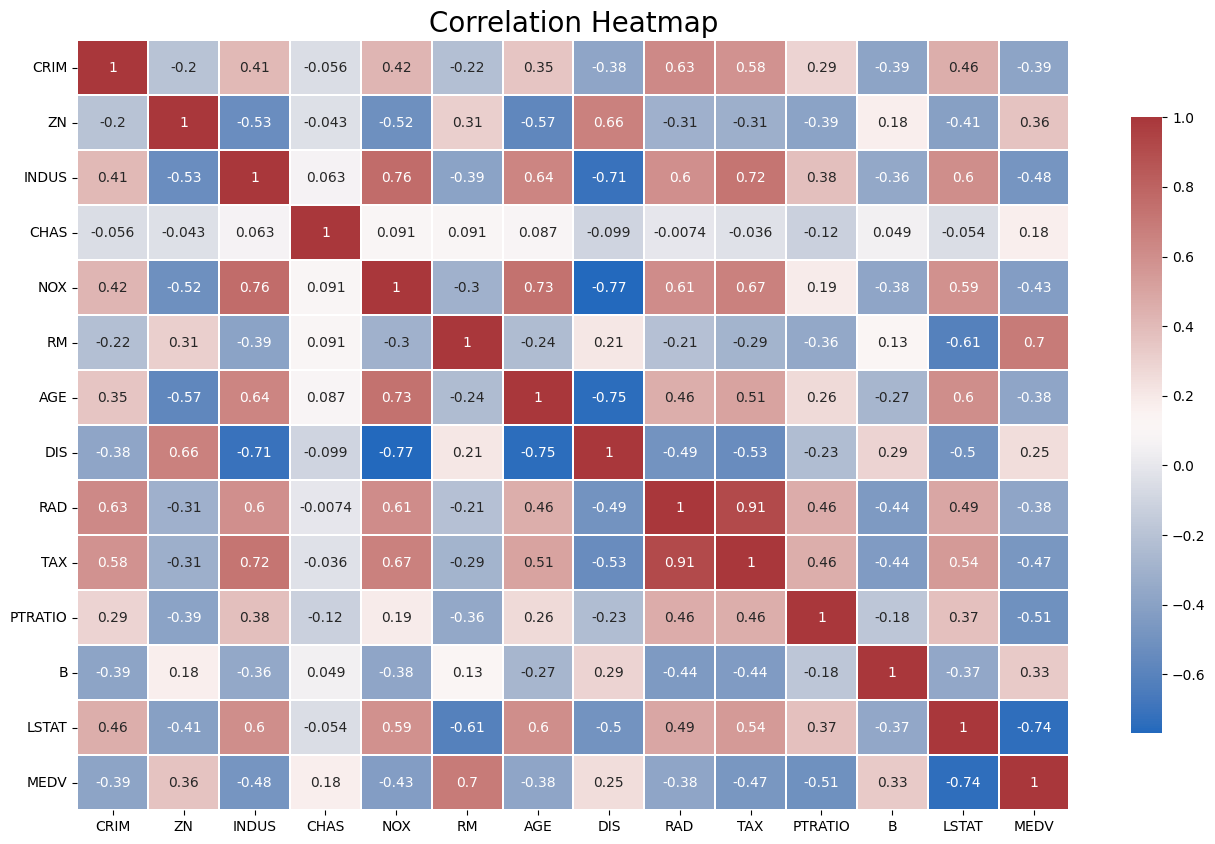

In [10]:
corr = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='vlag', cbar_kws={"shrink": .8}, linecolor='white', linewidths=0.1)
plt.title('Correlation Heatmap', fontsize=20)
plt.yticks(rotation=0)
plt.show()

### Variables that are highly correlated with the target variable

Our goal is to identify the features that significantly impatc house prices. To do this, we will look at the correlation between each feature and the target variable.

In [11]:
positive_correlations = {feature: value for feature, value in corr['MEDV'].items() if value > 0.5}
negative_correlations = {feature: value for feature, value in corr['MEDV'].items() if value < -0.5}

positive_correlations.pop('MEDV', None)

print('Positive Correlations: ', positive_correlations)
for feature, correlation in positive_correlations.items():
    print(f'{feature}: {correlation}')

print('Negative Correlations: ', negative_correlations)
for feature, correlation in negative_correlations.items():
    print(f'{feature}: {correlation}')

Positive Correlations:  {'RM': 0.6953599470715401}
RM: 0.6953599470715401
Negative Correlations:  {'PTRATIO': -0.5077866855375623, 'LSTAT': -0.7376627261740145}
PTRATIO: -0.5077866855375623
LSTAT: -0.7376627261740145


### Scatter Plots for Linearity Check

The scatter plots below visualize the relationship between the most positively and negatively correlated features with the target variable `MEDV`. The linearity assumption is crucial for linear regression, and these plots help us check whether a linear model is appropriate for the data.


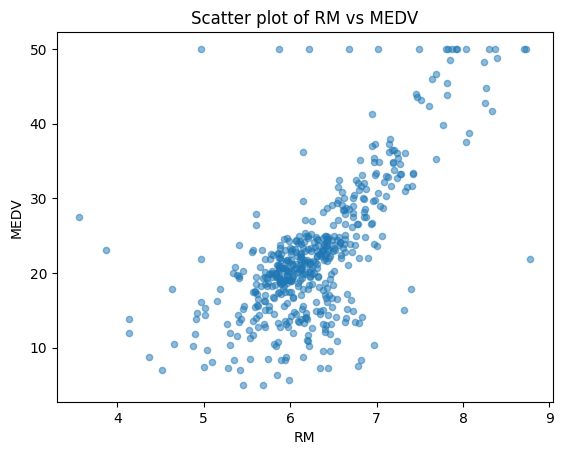

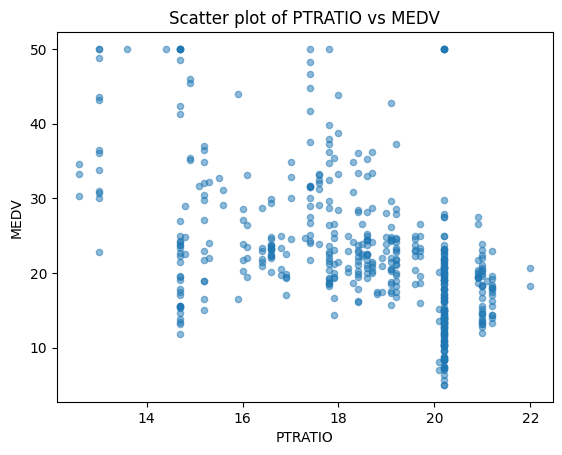

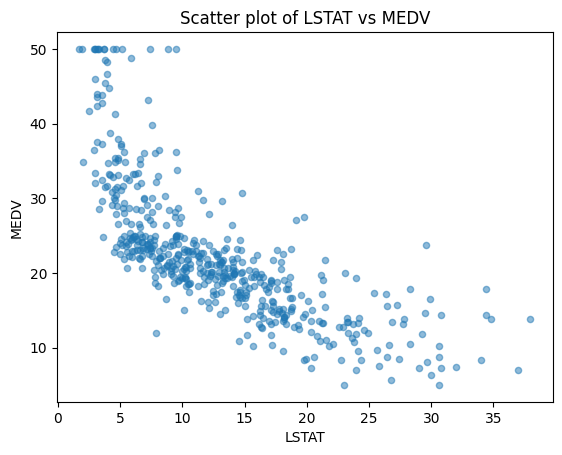

In [12]:
features = ['RM', 'PTRATIO', 'LSTAT']
target = 'MEDV'

for feature in features:
    df.plot(kind='scatter', x=feature, y=target, alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

## Developing a Least Squares Regression Model without Regularization

In this section, we will develop a Least Squares Regression model without regularization to predict the median value of houses. We will implement this manually using foundational Python, NumPy, and Pandas libraries.

In [13]:
# Function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [14]:
features = column_names[:-1]  # Excluding the target variable column
target = column_names[-1]     # Last column is the target variable

X = df[features].values
y = df[target].values

X_intercept = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Compute the coefficients
coefficients = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)

predictions = X_intercept.dot(coefficients)

# Split the data into training and testing sets
indices = np.random.permutation(len(X_intercept))

train_size = int(len(X_intercept) * 0.8)  # 80% for training
train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train, X_test = X_intercept[train_idx], X_intercept[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [15]:
# Fit the model
ls_coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Predict using the test set
ls_predictions = X_test.dot(ls_coefficients)

# Calculate RMSE
least_squares_mse = rmse(ls_predictions, y_test)
print(f'Test RMSE: {least_squares_mse}')

Test RMSE: 5.275343872185005


In [16]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

sklearn_predictions = sklearn_model.predict(X_test)

sklearn_rmse = rmse(sklearn_predictions, y_test)

print(f'Sklearn Test RMSE: {sklearn_rmse}')


Sklearn Test RMSE: 5.275343872184619


### Observations from the Least Squares Regression Model

- The model we developed manually is pretty accurate with an RMSE of $5.27$. We compare this RMSE with the RMSE of the `sklearn` library which is $5.27$.<br> Given the same RMSE, we can conclude that our model is indeed pretty accurate.

- The RMSE value obtained is the median value of owner-occupied homes in thousands of dollars (MEDV). This means that an RMSE of $5.27$ is the average error from our model is approximately $5,270$.

---

## Exercise 2: Lasso Regression

### Overview
In this exercise, our goal is to develop a [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)) model to incorporate feature selection in our model. We will use the same dataset as in the previous exercise and we will compare the performance of the Lasso Regression model with the Least Squares Regression model.

### Developing a Lasso Regression Model

In this section, we will develop a Lasso Regression model to predict the median value of houses. We will implement this manually using foundational Python, NumPy, and Pandas libraries.

## Mathematical Foudation of the Custom Lasso Regression Model using Coordinate Descent

The `LassoRegression` class implements the Lasso Regression, a technique that combines linear regression with L1 regularization. Mathematically, the Lasso regression seeks to minimize the following loss function:

$$ L(w, b) = \left( \sum_{i=1}^{n} \left( y^{(i)} - \left( w \cdot x^{(i)} + b \right) \right)^2 \right) + \lambda \sum_{j=1}^{d} |w_j| $$

where:
- $w$ represents the weight vector,
- $b$ is the bias term,
- $x^{(i)}$ and $y^{(i)}$ are the feature vector and target value for the $i$-th example,
- $n$ is the number of training examples,
- $d$ is the number of features,
- $\lambda$ is the regularization parameter that controls the strength of the L1 penalty.

### Coordinate Descent Algorithm

The coordinate descent algorithm is used for optimization in Lasso Regression. The algorithm updates each weight $w_j$ in the model one at a time by minimizing the loss function with respect to that weight while keeping all other weights fixed.

The update rule for the weight $w_j$ during the coordinate descent step is as follows:

- Compute the partial residual for feature $j$ by excluding its contribution from the model prediction.
- Calculate the correlation $\rho_j$ between the partial residual and feature $j$.
- Apply the soft-thresholding operator to $\rho_j$ with the regularization parameter $\lambda$ to determine the updated value of $w_j$.

The soft-thresholding operator is defined as:

$$ S(\rho, \lambda) = \text{sign}(\rho) \cdot \max(|\rho| - \lambda, 0) $$

The weight $w_j$ is updated by setting:

$$ w_j = \frac{S(\rho_j, \lambda)}{z_j} $$

where $z_j$ is the sum of squares of the feature column $j$.

## Custom Lasso Regression Class Explanation

The `CustomLasso` class is an implementation of the Lasso regression algorithm, a popular technique in linear regression that incorporates L1 regularization. This regularization is effective in both preventing overfitting and performing feature selection by penalizing the absolute size of the regression coefficients.

### Class Initialization
When an instance of `CustomLasso` is created, it initializes the following key parameters:

- `alpha`: The regularization strength. A higher value of `alpha` increases the regularization effect, leading to sparser coefficients (more coefficients being zero).
- `tolerance`: The convergence tolerance for the coordinate descent algorithm. The fitting process stops when the change in weights between iterations falls below this threshold.

### Fitting the Model
The `fit` method of the `CustomLasso` class is responsible for training the Lasso model:

1. **Initialize Weights**: The weights are initialized to zeros. The length of the weights vector corresponds to the number of features in the dataset.
2. **Coordinate Descent**: The method then iteratively updates the weights of the model using the coordinate descent algorithm. This algorithm minimizes the Lasso cost function (comprising the least squares loss and the L1 penalty).

During each iteration of coordinate descent:

- **Compute Partial Residuals**: For each feature, calculate the partial residual by excluding the effect of the current feature from the model.
- **Update Weights**: Update each weight based on its correlation with the partial residual. The L1 penalty is applied, shrinking some coefficients to zero, hence facilitating feature selection.

The process continues until the maximum change in weights across all features is less than the specified tolerance.

### Making Predictions
Once the model is trained, predictions can be made for new data using the `predict` method. This method calculates the dot product of the input features and the optimized weight vector, providing the predicted output.

### Helper Functions
Several private methods support the fitting process:

- `_predicted_values`: Computes the predictions for a given set of weights and features.
- `_rho_compute`: Calculates the correlation of a feature with the residual, which is crucial for the weight update step in coordinate descent.
- `_z_compute`: Computes the sum of squares of each feature, used in the normalization of the weight update.
- `_coordinate_descent`: Implements the coordinate descent algorithm, optimizing the weights while applying the L1 penalty.

In [17]:
class CustomLasso:
    def __init__(self, alpha=0.1, tolerance=0.0001):
        self.alpha = alpha
        self.tolerance = tolerance
        self.weights = None
        self.iterations = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        z = self._z_compute(X)

        self.weights, self.iterations, _ = self._coordinate_descent(y, X, self.weights, self.alpha, z, self.tolerance)
        return self

    def predict(self, X):
        return np.matmul(X, self.weights)

    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        return np.sum(X[:, j] * residual)

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def path(self, X, y, alphas):
        coefs = []
        for alpha in alphas:
            self.alpha = alpha
            self.fit(X, y)
            coefs.append(self.weights)
        return alphas, np.array(coefs)

    def _coordinate_descent(self, y, X, w, alpha, z, tolerance):
        max_step = 100.
        iteration = 0
        N = len(y)

        while max_step > tolerance:
            iteration += 1
            old_weights = np.copy(w)

            for j in range(len(w)):
                rho_j = self._rho_compute(y, X, w, j)
                if j == 0:  # Intercept
                    w[j] = rho_j / z[j]
                else:  # Regularized coefficients
                    if rho_j < -alpha * N:
                        w[j] = (rho_j + alpha * N) / z[j]
                    elif rho_j > alpha * N:
                        w[j] = (rho_j - alpha * N) / z[j]
                    else:
                        w[j] = 0.
            step_sizes = np.abs(old_weights - w)
            max_step = np.max(step_sizes)

        return w, iteration, max_step

In [18]:
custom_lasso = CustomLasso(alpha=0.1, tolerance=0.0001)
custom_lasso.fit(X_train, y_train)

print("Custom Lasso Intercept:", custom_lasso.weights[0])
print("\nCustom Lasso Coefficients:\n", custom_lasso.weights[1:])
print("\n Custom Lasso RMSE:", rmse(custom_lasso.predict(X_test), y_test))

Custom Lasso Intercept: 21.521159635502848

Custom Lasso Coefficients:
 [-0.09139061  0.04630505  0.          3.03102528  0.          3.93684239
 -0.01406766 -1.00797623  0.23151936 -0.01326236 -0.71818842  0.01063392
 -0.53670264]

 Custom Lasso RMSE: 5.280594480363245


In [19]:
from sklearn.linear_model import Lasso

sklearn_lasso = Lasso(alpha=0.1)
sklearn_lasso.fit(X_train[:, 1:], y_train)  # X_train[:, 1:] to exclude intercept

print("Sklearn Lasso intercept :", sklearn_lasso.intercept_)
print("\nSklearn Lasso coefficients :", sklearn_lasso.coef_)
print("\nSklearn Lasso RMSE :", rmse(sklearn_lasso.predict(X_test[:, 1:]), y_test))

Sklearn Lasso intercept : 21.492659135114888

Sklearn Lasso coefficients : [-0.0913709   0.04630801  0.          3.03157011 -0.          3.93887723
 -0.0140678  -1.00786758  0.23135862 -0.01325641 -0.71765344  0.01064087
 -0.53656129]

Sklearn Lasso RMSE : 5.2808468023567805


As we can clearly observe the results are pretty similar to the results of the Lasso Regression model of the `sklearn` library.

## Visualization of the Lasso Regression Model

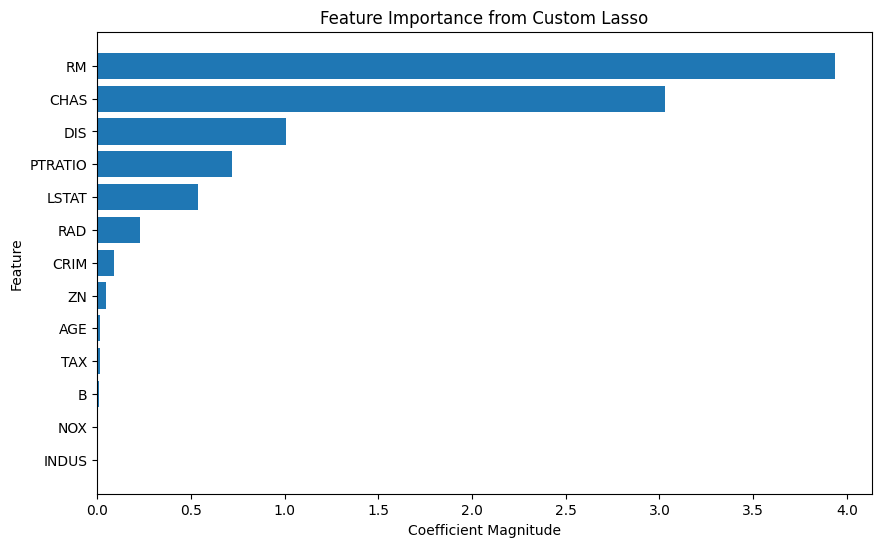

In [20]:
plt.figure(figsize=(10, 6))
feature_importance = np.abs(custom_lasso.weights[1:])
features = np.array(features)
sorted_idx = np.argsort(feature_importance)
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from Custom Lasso')
plt.show()


## Observations from the Plot:

- **Top Features**: The length of the bars corresponds to the absolute magnitude of each feature's coefficient. Longer bars indicate features with a greater influence on the model's output. In this case, `RM` and `CHAS` show the largest coefficients, suggesting they are important predictors in the dataset.

- **Feature Selection**: One of the advantages of Lasso regression is its ability to perform feature selection. Features with zero or near-zero coefficients are effectively "selected out" by the model. This plot can thus be used to identify which features are contributing to the model.

- **Interpretability**: The coefficients in Lasso regression can be directly linked to the importance of each feature, making the model more interpretable. Positive values indicate a direct relationship, whereas negative values indicate an inverse relationship with the target variable.


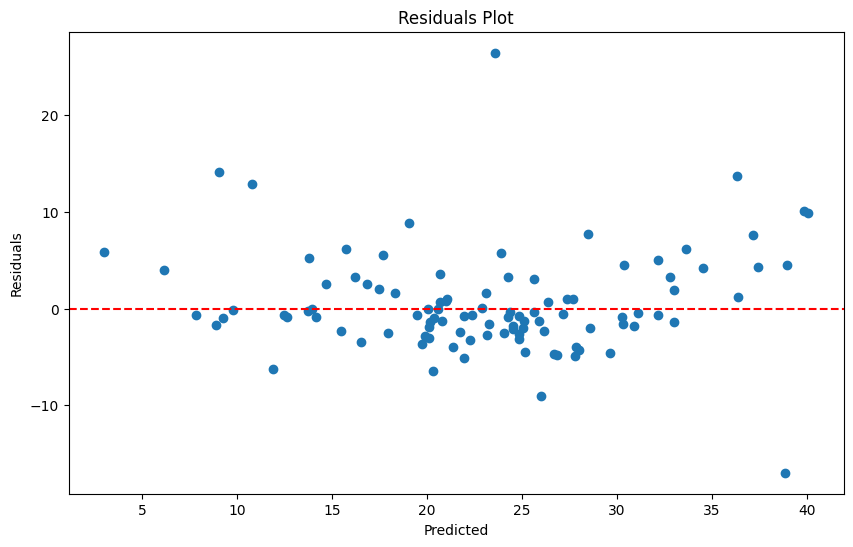

In [22]:
residuals = y_test - lasso_predictions
plt.figure(figsize=(10, 6))
plt.scatter(lasso_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


# Residuals Plot Analysis

This Residuals Plot displays the differences between the actual and predicted values from the Lasso regression model. Each point represents an observation from the dataset, with the horizontal axis showing the predicted values and the vertical axis representing the residuals (the actual minus the predicted value).

## Key Observations:

- **Centering Around Zero**: The red dashed line at zero on the y-axis represents the ideal scenario where predicted values match the actual values perfectly. A good model will have residuals scattered around this line.

- **Random Distribution**: Ideally, residuals should appear randomly distributed around the zero line, suggesting that the model's errors are random and that the model is not systematically over- or under-predicting.

- **Outliers**: Points far from the zero line are outliers. These are cases where the model's predictions were significantly different from the actual values.

- **Homoscedasticity**: We expect to see homoscedasticity (equal variance) of residuals across all levels of predictions. If the plot shows patterns, like a funnel shape where the residuals fan out for large or small predicted values, it suggests heteroscedasticity.

## Interpretation for Model Improvement:

- **No Clear Patterns**: The lack of clear patterns suggests that the model's assumptions are likely being met. However, the presence of several outliers could indicate that the model struggles with certain data points.

- **Potential for Improvement**: If there is a pattern in the residuals, it might indicate that the model could be improved by considering non-linear relationships or interaction terms, or by addressing outliers or leverage points.


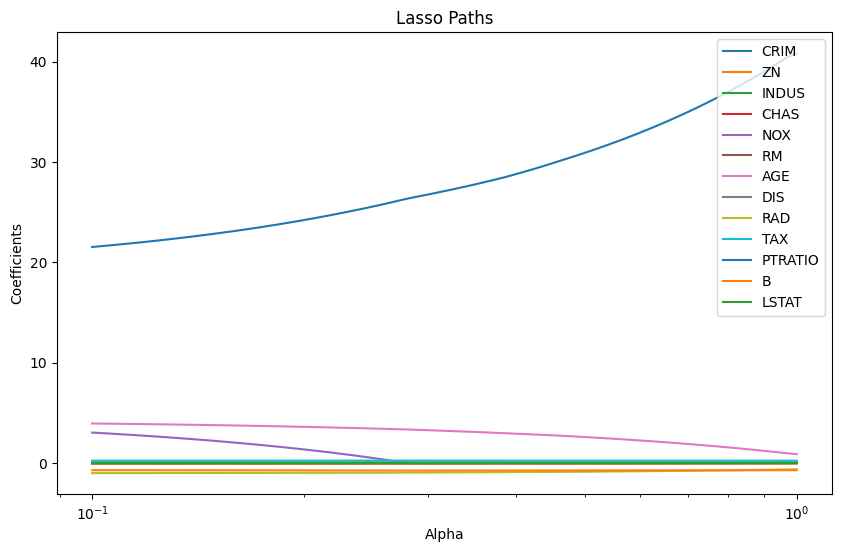

In [23]:
alphas = np.logspace(-1, 0, 100)

# Initialize CustomLasso and compute the path
custom_lasso = CustomLasso(tolerance=0.0001)
alphas, coefs = custom_lasso.path(X_train, y_train, alphas)

# Plot Lasso paths
plt.figure(figsize=(10, 6))
for coef, feature in zip(coefs.T, features):
    plt.plot(alphas, coef, label=feature)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend(loc='upper right')
plt.axis('tight')
plt.show()

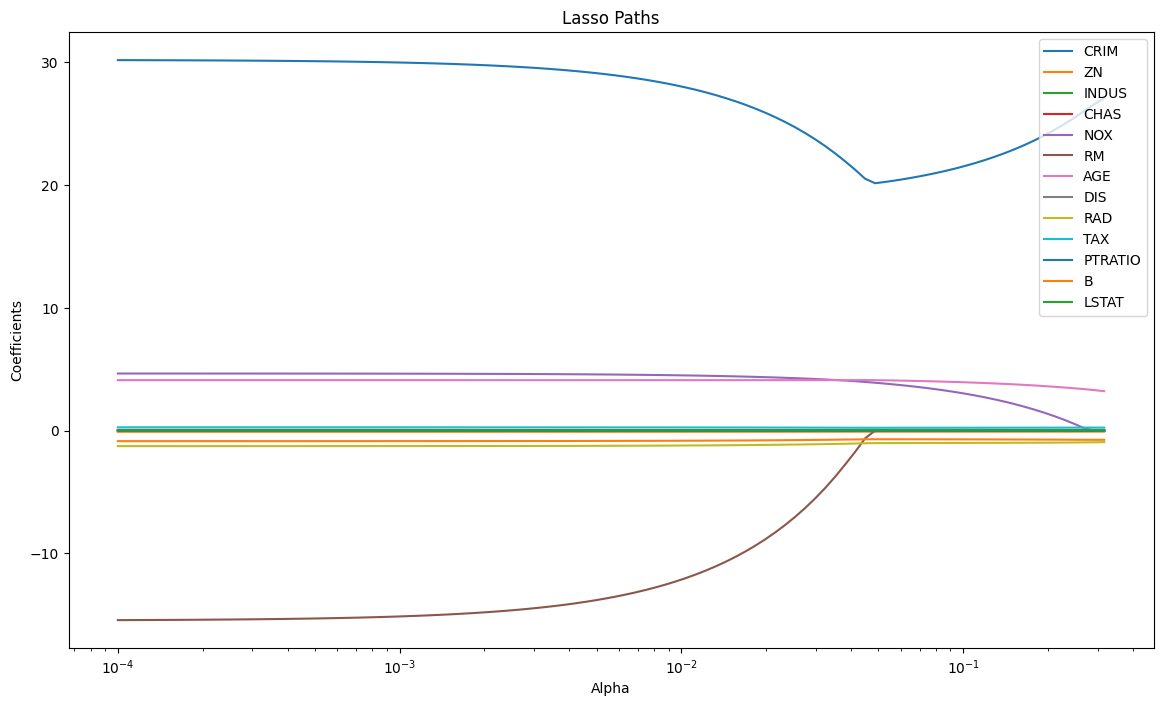

In [24]:
num_alphas = 100
alphas = np.logspace(-4, -0.5, num_alphas)

coefs = []

for current_alpha in alphas:
    lasso = CustomLasso(alpha=current_alpha, tolerance=0.0001)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.weights)

coefs = np.array(coefs)

plt.figure(figsize=(14, 8))
for coef_l, feature in zip(coefs.T, features):
    plt.plot(alphas, coef_l, label=feature)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend(loc='upper right')
plt.axis('tight')
plt.show()


## Lasso Paths Analysis

The Lasso Paths plot provides a visual representation of the coefficients of the Lasso regression model across different values of the regularization parameter, `alpha`. Each line in the plot corresponds to a different feature from the dataset, and its trajectory shows how the respective coefficient changes as `alpha` increases.

- **Coefficient Shrinkage**: As `alpha` increases (moving left to right on the x-axis), the absolute values of the coefficients decrease. This is a characteristic behavior of Lasso regression, where increasing regularization strength leads to more significant shrinkage of the coefficients.

- **Feature Selection**: The lines that cross the horizontal axis at zero represent features whose coefficients have been shrunk to zero by the Lasso model. The point at which they cross is the `alpha` value beyond which the model does not consider those features significant.

- **Dominant Features**: Features with coefficients that remain non-zero across a wide range of `alpha` values are considered more significant by the model. In this plot, the feature represented by the blue line (possibly `RM`, which stands for average number of rooms) seems to be the most dominant, as its coefficient stays large and non-zero even as `alpha` increases.

- **Least Important Features**: Conversely, features whose coefficients quickly converge to zero as `alpha` increases are deemed less important. For instance, the brown line (`LSTAT`, which could represent the percentage of lower status of the population) drops significantly as `alpha` increases, suggesting it is a less stable predictor in the presence of regularization.

## Interpretation of the Alpha Axis

- The x-axis is on a logarithmic scale, which allows us to see the coefficient behavior across several orders of magnitude of `alpha`. Smaller values of `alpha` (towards the right) indicate less regularization, where Lasso behaves more like a standard linear regression. Larger values (towards the left) impose more regularization, increasing the sparsity of the model by forcing more coefficients to zero.

## Practical Implications

- This plot can guide the choice of `alpha` in a Lasso model. For instance, if we want a balance between model simplicity and maintaining significant predictors, we might choose an `alpha` value just before the most critical features' coefficients start to converge to zero.

- It's important to cross-validate the choice of `alpha` to prevent overfitting. The `alpha` that results in the lowest cross-validated RMSE or another error metric should be chosen for the final model.

- The behavior of the coefficients across different `alpha` values also provides insight into the data's structure. Features that are robust to regularization may have a stronger or more direct relationship with the target variable.

In summary, the Lasso Paths plot is an essential tool for understanding the effect of Lasso regularization on feature selection and model complexity. It helps in choosing an appropriate `alpha` that balances model accuracy and complexity, which is crucial for building models that generalize well to new data.

## Comparisson of the Lasso Regression Model with the Least Squares Regression Model
In the context of the Boston Housing dataset, we have evaluated the performance of both the Least Squares and Lasso regression models. The key metric for comparison is the RMSE (Root Mean Squared Error) on the test data, which reflects the predictive accuracy of each model.

### Model Performance:
- **Sklearn Least Squares RMSE**: 5.275343872184619
- **Sklearn Lasso RMSE**: 5.2808468023567805

The RMSE values are very close, indicating that both models have similar predictive accuracy on this particular dataset.

### Feature Selection:
- **Least Squares**: This model does not inherently select features but rather includes all of them in the model. If all features are relevant and there is little to no multicollinearity, this model could be quite effective.
- **Lasso**: Lasso performs feature selection by introducing an L1 penalty, which can shrink some of the less important feature coefficients to zero, resulting in a model that is potentially easier to interpret.

### Interpretability:
- **Least Squares**: Due to the use of all features, the interpretability of the model could be complicated if there are a large number of features, especially if some of them are not significant.
- **Lasso**: The Lasso model's feature selection can lead to a sparser and more interpretable model by highlighting the most significant predictors.

### Conclusion:
In this analysis, the Least Squares and Lasso models have demonstrated very similar performance in terms of RMSE. The choice between the two would then be influenced by the preference for model simplicity or the need for feature selection. If interpretability and understanding which features are most influential is important, Lasso may be the preferred model despite the negligible increase in RMSE. However, if the primary goal is prediction with all available information, and all features are assumed relevant, the Least Squares model is just as suitable.


---

## Exercise 3: Handling Missing Data

### Overview
In this exercise, we will systematically introduce missing values into the Boston Housing Dataset and we will analyze the performance of the Least Squares Regression model and the Lasso Regression model in the presence of missing data.

In [25]:
def make_missing_data(df, pct_missing):
    df_missing = df.copy()
    n_missing = int(np.floor(pct_missing * len(df)))
    missing_indices = np.random.choice(df.index, n_missing, replace=False)
    for col in df.columns[:-1]:  # Skip the target column
        df_missing.loc[missing_indices, col] = np.nan
    return df_missing

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

pct_missing = 0.25
df_missing = make_missing_data(df, pct_missing)

# Split the data into features and target
X_missing = df_missing.iloc[:, :-1]
y = df_missing.iloc[:, -1]

X_train_missing, X_test_missing, y_train, y_test = train_test_split(X_missing, y, test_size=0.2, random_state=42)

# Impute missing data using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_missing)
X_test_imputed = imputer.transform(X_test_missing)

ls_model = LinearRegression()
ls_model.fit(X_train_imputed, y_train)

ls_predictions = ls_model.predict(X_test_imputed)

lasso = CustomLasso(alpha=0.1)
lasso.fit(X_train_imputed, y_train)

y_pred = lasso.predict(X_test_imputed)

# Calculate RMSE
rmse_lasso = rmse(y_test, y_pred)
rmse_ls = rmse(y_test, ls_predictions)

print(f'Lasso: RMSE with {pct_missing*100}% missing data: {rmse_lasso}')
print(f'Least Squares: RMSE with {pct_missing*100}% missing data: {rmse_ls}')

Lasso: RMSE with 25.0% missing data: 5.544243886285302
Least Squares: RMSE with 25.0% missing data: 5.159301042073094


In [27]:
pct_missing = 0.5
df_missing = make_missing_data(df, pct_missing)

# Split the data into features and target
X_missing = df_missing.iloc[:, :-1]
y = df_missing.iloc[:, -1]

X_train_missing, X_test_missing, y_train, y_test = train_test_split(X_missing, y, test_size=0.2, random_state=42)

# Impute missing data using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_missing)
X_test_imputed = imputer.transform(X_test_missing)

ls_model = LinearRegression()
ls_model.fit(X_train_imputed, y_train)

ls_predictions = ls_model.predict(X_test_imputed)

lasso = CustomLasso(alpha=0.1)
lasso.fit(X_train_imputed, y_train)

y_pred = lasso.predict(X_test_imputed)

# Calculate RMSE
rmse_lasso = rmse(y_test, y_pred)
rmse_ls = rmse(y_test, ls_predictions)

print(f'Lasso: RMSE with {pct_missing*100}% missing data: {rmse_lasso}')
print(f'Least Squares: RMSE with {pct_missing*100}% missing data: {rmse_ls}')

Lasso: RMSE with 50.0% missing data: 6.8428820962828345
Least Squares: RMSE with 50.0% missing data: 6.801099746915054


In [28]:
pct_missing = 0.75
df_missing = make_missing_data(df, pct_missing)

# Split the data into features and target
X_missing = df_missing.iloc[:, :-1]
y = df_missing.iloc[:, -1]

X_train_missing, X_test_missing, y_train, y_test = train_test_split(X_missing, y, test_size=0.2, random_state=42)

# Impute missing data using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_missing)
X_test_imputed = imputer.transform(X_test_missing)

ls_model = LinearRegression()
ls_model.fit(X_train_imputed, y_train)

ls_predictions = ls_model.predict(X_test_imputed)

lasso = CustomLasso(alpha=0.1)
lasso.fit(X_train_imputed, y_train)

y_pred = lasso.predict(X_test_imputed)

# Calculate RMSE
rmse_lasso = rmse(y_test, y_pred)
rmse_ls = rmse(y_test, ls_predictions)

print(f'Lasso: RMSE with {pct_missing*100}% missing data: {rmse_lasso}')
print(f'Least Squares: RMSE with {pct_missing*100}% missing data: {rmse_ls}')

Lasso: RMSE with 75.0% missing data: 8.43638696596016
Least Squares: RMSE with 75.0% missing data: 8.424068481718988


## Analysis of Missing Data on Regression Models

After systematically introducing missing values into the dataset and evaluating the performance of both Lasso and Least Squares regression models, the following observations were made:

- **Increase in Error with More Missing Data**: 
  As the percentage of missing data rises from 25% to 75%, there is a clear trend of increasing RMSE for both models. This suggests that the absence of data leads to less informed models, resulting in decreased accuracy.

- **Comparison of Model Robustness**: 
  In all scenarios, the Least Squares regression demonstrates a slightly lower RMSE compared to the Lasso regression. This may indicate a higher robustness of the Least Squares model under conditions of missing data or could reflect the specific nature of the dataset and missing data mechanism.

- **Impact of Lasso Regularization**: 
  The regularization in Lasso, which is intended to prevent overfitting, might contribute to the omission of relevant features when data is missing, especially if the data is not missing completely at random.

- **Model Interpretability Concerns**: 
  With an increase in missing data, model interpretability is likely to degrade. In the case of Lasso, important predictors might be wrongly discarded, reducing the model's interpretability.

- **Methods of Handling Missing Data**: 
  The approach taken to impute missing data (mean imputation in this case) can also impact model performance. More sophisticated imputation techniques may be necessary as missing data increases to avoid introducing bias.

- **Practical Implications**: 
  Practically, these findings underline the necessity for advanced imputation strategies or models adept at handling significant levels of missing data. It is also crucial to understand the mechanism behind the missing data to ensure the chosen imputation method is suitable.

In summary, the results underscore the significance of careful missing data management and the selection of appropriate imputation methods, which become increasingly important as the amount of missing data grows.

---

## Exercise 4,5: Matrix Completion & Re-evaluation using the Completed Dataset

### Overview

In those exercises, we will implement a matrix completion algorithm to fill in the missing values of the Boston Housing Dataset. Then we will re-evaluate the performance of the Least Squares Regression model and the Lasso Regression model in the presence of missing data. <br>
The matrix completion algorithm is based on the lecture notes of the course and specifically using the nuclear norm minimization method.

## Matrix Completion via Nuclear Norm Minimization

Matrix completion is a powerful technique used to impute missing values in a dataset. It's particularly useful in scenarios where the data is believed to have an underlying low-rank structure, such as in recommendation systems, image processing, and time series prediction. The method we've implemented here is based on nuclear norm minimization, which is a popular approach for matrix completion.

### Methodology

The core idea behind nuclear norm minimization is to find a matrix that is close to the original matrix in the observed entries while having a low rank. This is achieved through a process known as Singular Value Thresholding (SVT).

#### Singular Value Thresholding (SVT)

SVT operates on the principle that a low-rank matrix can be approximated by modifying its singular values. The process involves:

1. **Decomposing** the matrix using Singular Value Decomposition (SVD). SVD breaks down a matrix into three components: U (left singular vectors), Σ (singular values), and $V^T$ (right singular vectors).
2. **Applying Soft Thresholding** to the singular values. This operation reduces the magnitude of each singular value, effectively shrinking smaller values towards zero, thereby reducing the rank of the matrix.
3. **Reconstructing** the matrix using the modified singular values and the original U and $V^T$ matrices.

#### The Nuclear Norm Minimization Algorithm

The algorithm iteratively updates the matrix to approximate the missing values. The steps are as follows:

1. **Initialize** the matrix B as a copy of the original matrix X, with missing values initially filled with zeros.
2. In each **iteration**, create a combined matrix that incorporates known values from X and estimated values from the current B for the missing entries.
3. **Apply SVT** to this combined matrix to get a new estimate of B.
4. **Check for Convergence**: The algorithm stops if the change in the matrix (measured in Frobenius norm) relative to the original matrix is below a specified tolerance level. This indicates that subsequent iterations are not significantly altering the matrix, suggesting that it has converged to a solution.

In [41]:
def matrix_completion(X, mask, lambda_reg=1, max_iter=100, tol=1e-4):
    """
    Perform nuclear norm minimization to impute missing values in a matrix.

    This function applies Singular Value Thresholding (SVT) iteratively to
    approximate the missing values in the matrix X.

    Parameters:
    - X (numpy.ndarray): The incomplete matrix with missing values.
    - mask (list of tuples): Indices of the unknown (missing) values in X.
    - lambda_reg (float): The regularization parameter for soft thresholding.
    - max_iter (int): Maximum number of iterations for the convergence of the algorithm.
    - tol (float): Tolerance for convergence. The algorithm stops if the relative 
    change in norm is less than this value.

    Returns:
    - numpy.ndarray: The matrix with completed values.
    """

    def soft_threshold(x):
        return np.sign(x) * np.maximum(np.abs(x) - lambda_reg, 0)

    def SVT(X):
        U, S, Vt = np.linalg.svd(X, full_matrices=False)
        S = soft_threshold(S)
        return U @ np.diag(S) @ Vt

    B = X.copy()
    for _ in range(max_iter):
        combined_matrix = X.copy()
        for i in mask:
            combined_matrix[i] = B[i]

        B = SVT(combined_matrix)
        if np.linalg.norm(X - B) / np.linalg.norm(X) < tol:
            break

    return B

In [39]:
from sklearn.model_selection import train_test_split

# Introduce 25% missing values
df_with_missing = make_missing_data(df, 0.25)

missing_mask = df_with_missing.isna()
mask = np.argwhere(missing_mask.values)

# Replace NaNs with zeros
initial_matrix = df_with_missing.fillna(0).values

completed_data = matrix_completion(initial_matrix, mask, lambda_reg=1, max_iter=100, tol=1e-4)

completed_data_df = pd.DataFrame(completed_data, columns=df.columns)

X_completed = completed_data_df.iloc[:, :-1]
y_completed = completed_data_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_completed, y_completed, test_size=0.2, random_state=42)

ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
y_pred_ls = ls_model.predict(X_test)
rmse_ls = np.sqrt(mean_squared_error(y_test, y_pred_ls))

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f'Least Squares RMSE after matrix completion: {rmse_ls}')
print(f'Lasso RMSE after matrix completion: {rmse_lasso}')

Least Squares RMSE after matrix completion: 4.3088887090442
Lasso RMSE after matrix completion: 4.229612423212548


In [47]:
# Introduce 50% missing values
df_with_missing = make_missing_data(df, 0.50)

missing_mask = df_with_missing.isna()
mask = np.argwhere(missing_mask.values)

# Replace NaNs with zeros
initial_matrix = df_with_missing.fillna(0).values

completed_data = matrix_completion(initial_matrix, mask, lambda_reg=1, max_iter=100, tol=1e-4)

completed_data_df = pd.DataFrame(completed_data, columns=df.columns)

X_completed = completed_data_df.iloc[:, :-1]
y_completed = completed_data_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_completed, y_completed, test_size=0.2, random_state=42)

ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
y_pred_ls = ls_model.predict(X_test)
rmse_ls = np.sqrt(mean_squared_error(y_test, y_pred_ls))

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f'Least Squares RMSE after matrix completion: {rmse_ls}')
print(f'Lasso RMSE after matrix completion: {rmse_lasso}')

Least Squares RMSE after matrix completion: 5.013852664630461
Lasso RMSE after matrix completion: 5.440084527889907


## Analysis of Model Performance: Impact of Matrix Completion on RMSE

We evaluated the performance of two regression models, Lasso and Least Squares, on our dataset under different conditions of missing data, and then reassessed their performance after applying a matrix completion process. The key metric for evaluation was the Root Mean Square Error (RMSE), which quantifies the difference between the predicted and actual values.

### RMSE Values With Different Levels of Missing Data

Initially, we observed the following RMSE values with different proportions of missing data:

- **With 50% Missing Data:**
  - Lasso Regression RMSE: 6.8429
  - Least Squares Regression RMSE: 6.8011

- **With 25% Missing Data:**
  - Lasso Regression RMSE: 5.5442
  - Least Squares Regression RMSE: 5.1593

These results indicate that as the proportion of missing data increases, the RMSE values also increase, reflecting a decrease in model accuracy. This outcome is expected since more missing data typically leads to a greater loss of information, making it more challenging for models to learn and predict accurately.

### RMSE Values After Matrix Completion

After applying matrix completion to impute missing values, we noted significant improvements in RMSE for both models:

- **After Matrix Completion (50% Missing Data):**
  - Least Squares Regression RMSE: 5.0139
  - Lasso Regression RMSE: 5.4401

- **After Matrix Completion (25% Missing Data):**
  - Least Squares Regression RMSE: 4.3089
  - Lasso Regression RMSE: 4.2296

These improved RMSE values post-matrix completion suggest that the imputation of missing values has a positive impact on model performance. The matrix completion process helped provide a more complete dataset, allowing the models to capture underlying patterns more effectively.

### Insights and Interpretation

- The **reduction in RMSE after matrix completion** demonstrates the effectiveness of the matrix completion approach in providing a better basis for predictive modeling. It suggests that the imputed values are reasonably accurate and help mitigate the impact of missing data.
- The **variation in RMSE improvement** between the two levels of missing data (50% vs. 25%) highlights the relationship between the amount of missing data and the effectiveness of the matrix completion. Generally, less missing data leads to a more accurate imputation and, consequently, better model performance.
- The **Lasso model shows a slightly larger improvement than Least Squares** in the 25% missing data scenario. This could be due to Lasso's inherent regularization, which might make it more adaptable to the changes introduced by the matrix completion.

**Caveats and Further Considerations:**

While the matrix completion method has shown promise in improving model accuracy, it's crucial to acknowledge that the imputed values are estimates. The nature of these estimates depends on the matrix completion method and the characteristics of the missing data. There might be underlying biases or inaccuracies introduced during imputation, especially if the missing data mechanism is complex. Therefore, additional validation techniques, such as cross-validation, are recommended to ensure the robustness and generalizability of the observed improvements.
